In [1]:
train_data = "https://drive.google.com/u/1/uc?id=1yBkhN7XriToj1XJ5i_2V4dfc4awOFRWb&export=download"
validation_data = "https://drive.google.com/u/1/uc?id=1do0OgKaaUfjxYPZ_Cqd1CiABKKE1pz_Z&export=download"

In [2]:
import pandas as pd
train = pd.read_csv(train_data)
validation = pd.read_csv(validation_data)

# Find x from the data

In [3]:
train.head(2)

,headline,label
0,tv future hands viewers home theatre systems ...,tech
1,worldcom boss left books alone former worldc...,business


In [4]:
train_sentences = train.headline.values
validation_sentences = validation.headline.values

In [5]:
# train_sentences[:5]

# convert text into vectors -- x to vectors

```python
import tensorflow as tf

corpus = [
'Today is a sunny day',
'Today is a rainy day'
]

corpus_valid = [
'Today is a sunny day and a rainy day',
'It is a rainy day'
]


vocab_size = 1000
max_len = 120
vectorize_layer = tf.keras.layers.TextVectorization(
 max_tokens=vocab_size, # Maximum vocab size.
 output_mode='int',
 output_sequence_length=max_len, # # Sequence length to pad the outputs to.
 )

vectorize_layer.adapt(corpus)
vectorized_train_sentences = vectorize_layer(corpus)
vectorized_valid_sentences = vectorize_layer(corpus_valid)
```

In [6]:
import tensorflow as tf

In [7]:
import tensorflow as tf
vocab_size = 1000
max_len = 120
vectorize_layer = tf.keras.layers.TextVectorization(
    max_tokens = vocab_size,
    output_sequence_length =max_len )

vectorize_layer.adapt(train_sentences)

In [8]:
vectorized_train_sentences = vectorize_layer(train_sentences)
vectorized_validation_sentences = vectorize_layer(validation_sentences)

In [9]:
vectorized_train_sentences

<tf.Tensor: shape=(1780, 120), dtype=int64, numpy=
array([[ 94, 151,   1, ...,   1,   1,   5],
       [  1, 578, 257, ...,   6,   1, 742],
       [  1,   1,   1, ...,   1, 418,   1],
       ...,
       [  1,   1,   1, ..., 222, 150,  78],
       [  1,  68,   1, ..., 323,  43, 550],
       [ 94,   1,   1, ..., 326,   0,   0]])>

# convert y or category to vector and respresent it with number as well

In [10]:
set(train.label)

{'business', 'entertainment', 'politics', 'sport', 'tech'}

In [11]:
max_token = 5 # explain why
output_sequence_length = 1
vectorize_layer_label = tf.keras.layers.TextVectorization(
    max_tokens = max_token, 
    output_sequence_length = output_sequence_length
)

vectorize_layer_label.adapt(train.label)
training_label_seq = vectorize_layer_label(train.label)
validation_label_seq = vectorize_layer_label(validation.label)

In [12]:
training_label_seq

<tf.Tensor: shape=(1780, 1), dtype=int64, numpy=
array([[1],
       [3],
       [2],
       ...,
       [2],
       [3],
       [1]])>

# Define a model

In [14]:
model = tf.keras.Sequential([
# YOUR CODE HERE
tf.keras.layers.Embedding(1000, 16, input_length = 120),
tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, return_sequences = True)),
tf.keras.layers.LSTM(18),
tf.keras.layers.Dense(28, activation = 'relu'),
tf.keras.layers.Dense(5, activation = 'softmax')
])
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 120, 16)           16000     
                                                                 
 bidirectional (Bidirectiona  (None, 120, 64)          12544     
 l)                                                              
                                                                 
 lstm_1 (LSTM)               (None, 18)                5976      
                                                                 
 dense (Dense)               (None, 28)                532       
                                                                 
 dense_1 (Dense)             (None, 5)                 145       
                                                                 
Total params: 35,197
Trainable params: 35,197
Non-trainable params: 0
____________________________________________________

In [15]:
history = model.fit(vectorized_train_sentences,
                    training_label_seq, 
                    validation_data = (vectorized_validation_sentences, validation_label_seq),
                    epochs = 30)

Epoch 1/30
56/56 [==============================] - 26s 244ms/step - loss: 1.4785 - accuracy: 0.3511 - val_loss: 1.3953 - val_accuracy: 0.3416
Epoch 2/30
56/56 [==============================] - 7s 128ms/step - loss: 1.3683 - accuracy: 0.3629 - val_loss: 1.3196 - val_accuracy: 0.3820
Epoch 3/30
56/56 [==============================] - 7s 127ms/step - loss: 1.3191 - accuracy: 0.3904 - val_loss: 1.2342 - val_accuracy: 0.5124
Epoch 4/30
56/56 [==============================] - 7s 128ms/step - loss: 1.2153 - accuracy: 0.4590 - val_loss: 1.1143 - val_accuracy: 0.5056
Epoch 5/30
56/56 [==============================] - 7s 130ms/step - loss: 0.9904 - accuracy: 0.5573 - val_loss: 0.9140 - val_accuracy: 0.5843
Epoch 6/30
56/56 [==============================] - 7s 128ms/step - loss: 0.8548 - accuracy: 0.6500 - val_loss: 0.7786 - val_accuracy: 0.6449
Epoch 7/30
56/56 [==============================] - 7s 130ms/step - loss: 1.0295 - accuracy: 0.5433 - val_loss: 1.0968 - val_accuracy: 0.4584
Epoch

# plot training

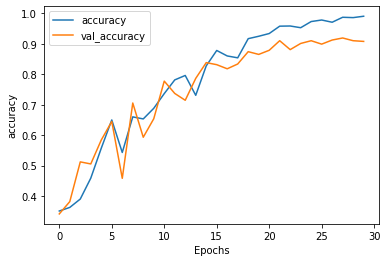

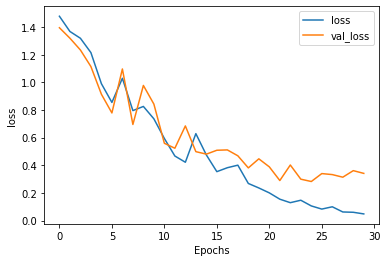

In [16]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")


In [17]:
model.save('model.pickle')